# ML ASSIGNMENT ON REGRESSION

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Reading the Train and Test CSV files
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<b>From train.info(), it is clear that the Item_Weight and Outlet_Size have NaN values (Null values). 
Also, we can see that the dataset has 5 Numerical features(Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year and Item_Outlet_Sales) and 7 Categorical features(Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type).</b>

# STEP 1: Data Pre- Processing

# a) Finding the Missing Value Features

In [6]:
# Join both the train and test dataset
train['source']='train'
test['source']='test'

dataset = pd.concat([train,test], ignore_index = True)
print("Train dataset shape:",train.shape)
print("Test dataset shape:",test.shape)
print("Concatenated dataset shape:",dataset.shape)

Train dataset shape: (8523, 13)
Test dataset shape: (5681, 12)
Concatenated dataset shape: (14204, 13)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [8]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<b>Now, in this concatenated dataset we have 3 features with missing NaN values. Rows from 8524 to 14204 (Test dataset) have NaN values in the 'Item_Outlet_Sales' column. This is our Target Variable. </b> 

In [10]:
#To find percentage of test set in the dataset
print(dataset["Item_Outlet_Sales"].isnull().sum()/dataset.shape[0]*100,"%")

39.995775837792166 %


# b) replacing missing data with substituted values
<b>Out of the 3 features with missing NaN values, the missing values in 'Item_Outlet_Sales' are the Values that need to be predicted by our model. Hence, we need to impute the NaN values in the Item_Weight and Outlet_Size columns.
Item_Weight missing values can be replaced by their mean and 
Outlet_Size missing values can be replaces by their mode</b>

In [11]:
# pivot_table() allows us to create a table that contains the mean values of identifiers
avg = pd.pivot_table(dataset,values='Item_Weight', index='Item_Identifier',aggfunc='mean')
avg

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
# We find that all examples containing the same Item_Identifier value have same Item_Weight.
# This proves the fact that the mean is same as their value.
# For example the mean value for the value "DRA12" in the Item_Identifier is same as the Item_Weight for 
# individual examples in the Item_Weight column.

df=dataset[dataset['Item_Identifier'].str.contains("DRA12")]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772,train
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,train
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,train
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,train
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924,train
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308,train
9023,DRA12,11.6,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
12435,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
13604,DRA12,11.6,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test


In [13]:
dataset[:][dataset['Item_Identifier'] == 'DRI11']
def impute(cols):
    Weight = cols[1]
    Identifier = cols[0]
    
    if pd.isnull(Weight):
        return avg['Item_Weight'][avg.index == Identifier]
    else:
        return Weight
print ('Orignal Number of missing values in Item_Weight:',sum(dataset['Item_Weight'].isnull()))

# Applying the impute() function to impute null values of Item_Weight
dataset['Item_Weight'] = dataset[['Item_Identifier','Item_Weight']].apply(impute,axis=1).astype(float)

print ('Number of missing values in Item_Weight after imputation: ',sum(dataset['Item_Weight'].isnull()))

Orignal Number of missing values in Item_Weight: 2439
Number of missing values in Item_Weight after imputation:  0


In [14]:
# Finding unique Outlet Types
dataset.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [15]:
# pivot_table() allows us to create a table that contains the mode of identifiers
mode = pd.pivot_table(dataset, values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
# Imputing Outlet_Size missing values with their mode
def impute_mode(cols):
    size = cols[1]
    Type = cols[0]
    
    if pd.isnull(size):
        return mode.loc['Outlet_Size'][mode.columns == Type][0]
    else:
        return size
print ('Orignal Number of missing values in Outlet_Size:',sum(dataset['Outlet_Size'].isnull()))

# Applying the impute() function to impute null values of Item_Weight
dataset['Outlet_Size'] = dataset[['Outlet_Type','Outlet_Size']].apply(impute_mode,axis=1)

print ('Number of missing values in Outlet_Size after imputation: ',sum(dataset['Outlet_Size'].isnull()))

Orignal Number of missing values in Outlet_Size: 4016
Number of missing values in Outlet_Size after imputation:  0


In [17]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


# c) Modifying the features in a more intuitive manner

In [19]:
dataset.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<b>Here, there are typos line case sensitive words and short cuts. The actual unique values must be ["Low Fat", "Regular"]. This modification has to be done before applying the model.</b>

In [20]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
dataset.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

<b>Also, the Outlet_Establishment_Year contains year in which the outlet was established. If we can get information on how many years the outlet has been working, then taht data would be more useful.</b>

In [21]:
dataset['Outlet_Year'] = 2020 - dataset['Outlet_Establishment_Year']
dataset.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
dataset.Outlet_Year.unique()

array([21, 11, 22, 33, 35, 18, 13, 23, 16], dtype=int64)

In [22]:
dataset.to_csv('insight.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,33


In [23]:
vmean = dataset.pivot_table(index = "Item_Identifier",  values = "Item_Visibility")

In [24]:
dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Visibility"] = dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Identifier"].apply(lambda x : vmean.at[x, "Item_Visibility"])

# STEP 3:Converting the categorical data into numerical data appropriately
<b> scikit-learn only accepts numerical variables. Hence, we need to convert all categorical variables into numeric types.</b>

In [25]:
# Turning all categorical variables into numerical values can be done by mapping each categorical value with  
# respective FREQUENCY of the values in the column

cat_var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Item_Identifier','Outlet_Identifier']
for i in cat_var:
    p  = dataset[i].value_counts().to_dict()
    dataset[i] = dataset[i].map(p)

In [26]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Year
0,9,9.30,9185,0.016047,1136,249.8092,1550,4655,3980,9294,3735.1380,train,21
1,9,5.92,5019,0.019278,726,48.2692,1546,4655,5583,1546,443.4228,train,11
2,10,17.50,9185,0.016760,736,141.6180,1550,4655,3980,9294,2097.2700,train,21
3,9,19.20,5019,0.017834,2013,182.0950,925,7996,5583,1805,732.3800,train,22
4,9,8.93,9185,0.009780,1548,53.8614,1553,1553,5583,9294,994.7052,train,33


# STEP 4: Finding Significant Predictor Variables

In [27]:
#Divide into test and train:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\dines\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,9,9.30,9185,0.016047,1136,249.8092,1550,4655,3980,9294,3735.1380,21
1,9,5.92,5019,0.019278,726,48.2692,1546,4655,5583,1546,443.4228,11
2,10,17.50,9185,0.016760,736,141.6180,1550,4655,3980,9294,2097.2700,21
3,9,19.20,5019,0.017834,2013,182.0950,925,7996,5583,1805,732.3800,22
4,9,8.93,9185,0.009780,1548,53.8614,1553,1553,5583,9294,994.7052,33


In [29]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
8523,9,20.750,9185,0.007565,1989,107.8622,1550,4655,3980,9294,NaN,21
8524,9,8.300,5019,0.038428,1136,87.3198,1543,7996,4641,9294,NaN,13
8525,9,14.600,9185,0.099575,280,241.7538,925,7996,5583,1805,NaN,22
8526,9,7.315,9185,0.015388,1989,155.0340,1543,7996,4641,9294,NaN,13
8527,9,13.600,5019,0.118599,1136,234.2300,1559,4655,5583,1559,NaN,35


<b>First, we need to find the correlation between each predictor and the target variable. This can be done using the corr() method.</b>

In [30]:
corr_matrix=train.corr()
corr_matrix['Item_Outlet_Sales']

Item_Identifier        -0.073375
Item_Weight             0.013261
Item_Fat_Content       -0.018719
Item_Visibility        -0.128453
Item_Type               0.038123
Item_MRP                0.567574
Outlet_Identifier       0.415482
Outlet_Size            -0.165968
Outlet_Location_Type    0.082256
Outlet_Type             0.100742
Item_Outlet_Sales       1.000000
Outlet_Year             0.049135
Name: Item_Outlet_Sales, dtype: float64

# Visualizing the correlation gives a better understanding.

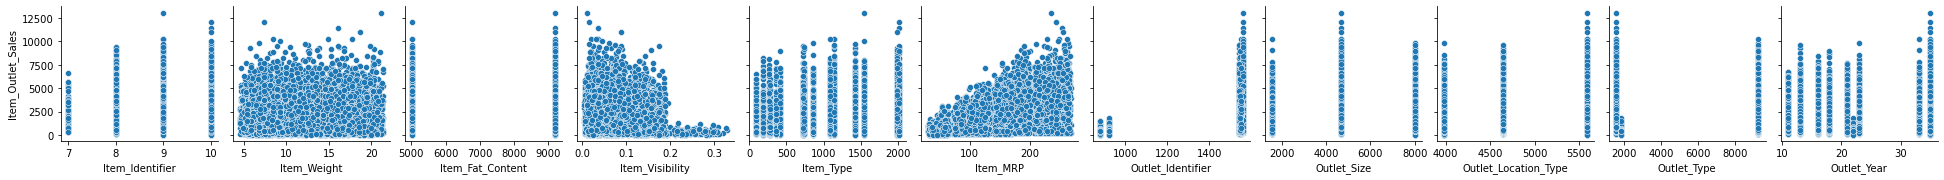

In [31]:
sns.pairplot(data=train,y_vars=['Item_Outlet_Sales'],x_vars=['Item_Identifier','Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP','Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Year'])


<AxesSubplot:>

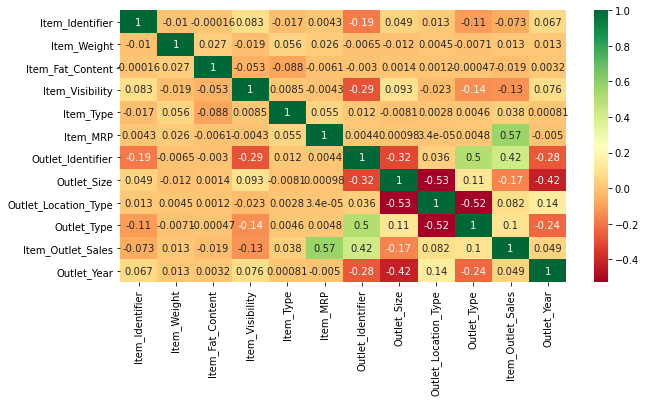

In [32]:
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, cmap = "RdYlGn", annot = True)

# Removing the less correlated features
<b>From the above plot, we can visualize that Item_Identifier, Item_Weight, item_fat_content,  Item_Type, Outlet_Location_Type have less correlation with the Outlet_Location_Type (Target Variable). We can remove these predictors from the model.</b>

In [33]:
train= train.drop(['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type'],axis=1)

<b>Finding the skewness gives helps us identify if scaling of the features is required.</b>

In [34]:
train.skew()

Item_Visibility      1.224502
Item_MRP             0.127202
Outlet_Identifier   -2.244440
Outlet_Size         -0.803252
Outlet_Type         -0.650419
Item_Outlet_Sales    1.177531
Outlet_Year          0.396641
dtype: float64

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Outlet_Year', ylabel='Density'>

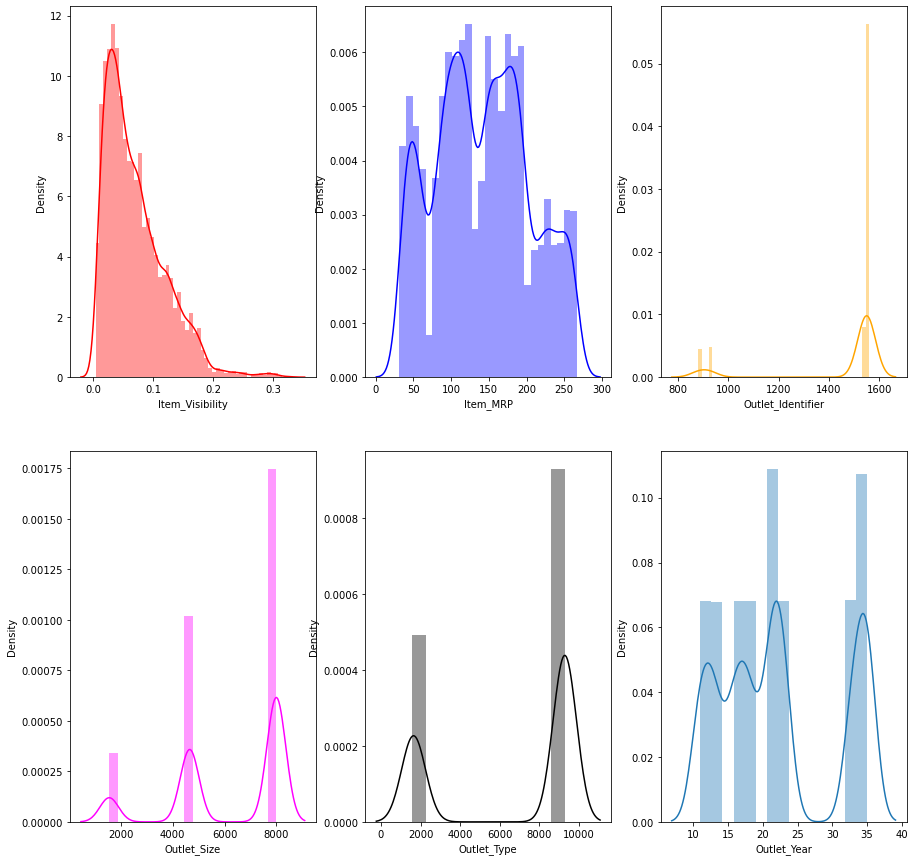

In [35]:
# Before Scaling
fig, ax = plt.subplots(2,3,figsize = (15,15))
sns.distplot(train["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(train["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(train["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.distplot(train["Outlet_Size"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(train["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(train["Outlet_Year"], kde =True, ax=ax[1,2])

# Normalization
<b>We find that the predictors are all not following normal distribution. Hence we need to apply normalization. I am using Log Scaling for this purpose.</b>

In [36]:
for i in train.columns:
    train[i] =np.log(train[i])

In [37]:
train.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,-4.132215,5.520697,7.346010,8.445697,9.137124,8.225540,3.044522
1,-3.948780,3.876794,7.343426,8.445697,7.343426,6.094524,2.397895
2,-4.088756,4.953133,7.346010,8.445697,9.137124,7.648392,3.044522
3,-4.026630,5.204529,6.829794,8.986697,7.498316,6.596300,3.091042
4,-4.627433,3.986414,7.347944,7.347944,9.137124,6.902446,3.496508


C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Outlet_Year', ylabel='Density'>

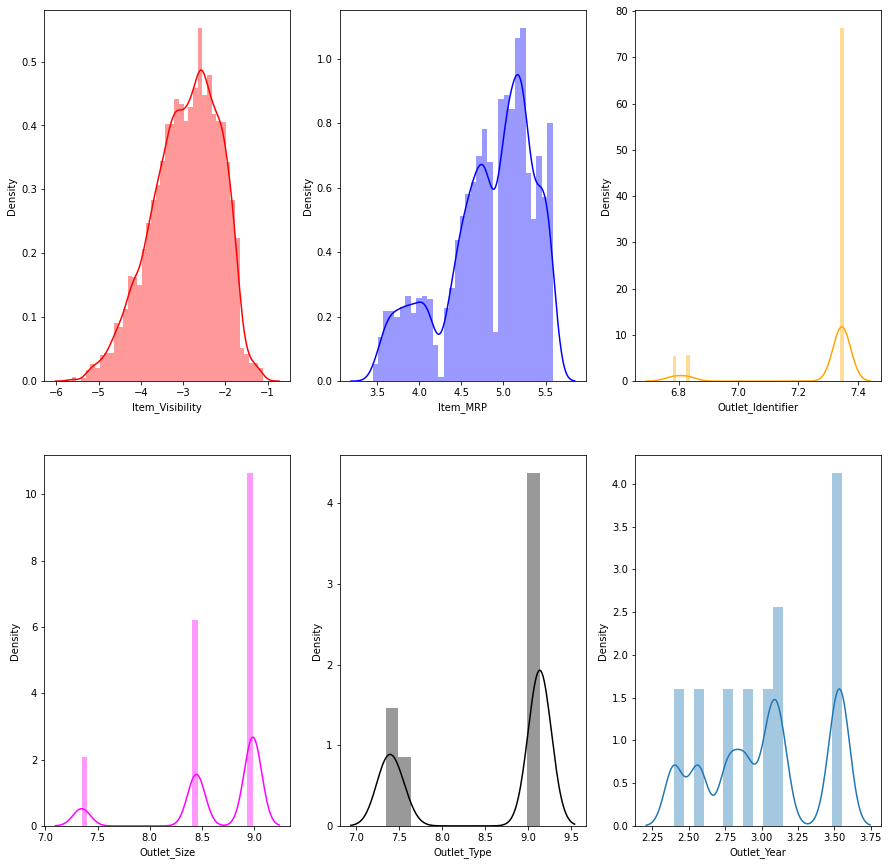

In [38]:
#After Scaling the variables
fig, ax = plt.subplots(2,3,figsize = (15,15))
sns.distplot(train["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(train["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(train["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.distplot(train["Outlet_Size"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(train["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(train["Outlet_Year"], kde =True, ax=ax[1,2])

# STEP 5: Building Model and identifying the best fit model

# Defining the Tatget and Predictor Variables
<b>Next, we need to define the Target and Predictor variables.</b>

In [39]:
y=train["Item_Outlet_Sales"]
x= train.drop(["Item_Outlet_Sales"],axis=1)
x.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Year
0,-4.132215,5.520697,7.346010,8.445697,9.137124,3.044522
1,-3.948780,3.876794,7.343426,8.445697,7.343426,2.397895
2,-4.088756,4.953133,7.346010,8.445697,9.137124,3.044522
3,-4.026630,5.204529,6.829794,8.986697,7.498316,3.091042
4,-4.627433,3.986414,7.347944,7.347944,9.137124,3.496508


# Importing necessary Libraries

In [40]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train/Test Split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Fitting Linear Regression Model:

In [42]:
reg = LinearRegression()
reg = reg.fit(x_train,y_train)

In [43]:
reg.coef_

array([-1.36762821e-03,  1.01607871e+00,  4.35106882e+00,  2.02439791e-01,
       -1.14157014e-01,  4.25280127e-01])

In [44]:
reg.intercept_

-31.33161334728591

In [45]:
y_pred = reg.predict(x_test)

In [46]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score = r2_score(y_test, y_pred)
print('Root Mean Squared Error:',rmse )
print('R2_Score:',r2_score*100,"%" )

Root Mean Squared Error: 0.5375914591271843
R2_Score: 72.95010719621588 %


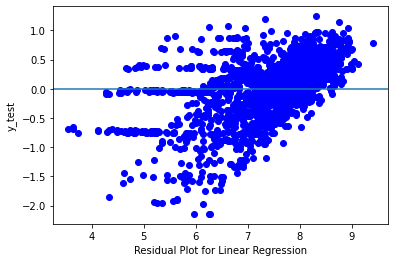

In [47]:
residue_lreg = y_test - y_pred
#Plotting Residual Plot
plt.scatter(y_test,residue_lreg, c = "blue")
plt.xlabel("Residual Plot for Linear Regression")
plt.ylabel("y_test")
plt.axhline(y = 0)

# Regularization:

# 1) Lasso Regression (L1 Regularization)

In [48]:
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls = ls.fit(x_train, y_train)

In [49]:
ls.coef_

array([-0.        ,  0.9848907 ,  3.64651026,  0.03249564, -0.04162165,
        0.19997325])

In [50]:
ls.intercept_

-24.520235674914517

In [51]:
ls_pred = ls.predict(x_test)

In [52]:
rmse_LS = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
print('Root Mean Squared Error:',rmse_LS )

Root Mean Squared Error: 0.5517663802701462


In [53]:
from sklearn.metrics import r2_score
r2_score_LS = r2_score(y_test, ls_pred)
print('R2_Score:',r2_score_LS*100,"%" )

R2_Score: 71.50482703170577 %


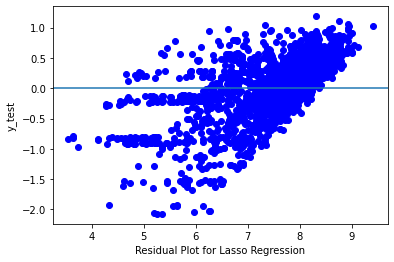

In [54]:
#RESIDUE VALUE AFTER LASSO REGRESSION
residue_lasso = y_test - ls_pred
#Plotting Residual Plot
plt.scatter(y_test,residue_lasso, c = "blue")
plt.xlabel("Residual Plot for Lasso Regression")
plt.ylabel("y_test")
plt.axhline(y = 0)

# 2) Ridge Regression (L2 Regularization)

In [55]:
#Ridge Regression
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [56]:
#Prediction AFTER Ridge regression
rr_pred = rr.predict(x_test)

In [57]:
#Accuracy score check
r2_score_RR = r2_score(y_test, y_pred)
print('R2_Score:',r2_score_RR*100,"%" )

R2_Score: 72.95010719621588 %


In [58]:
#RMSE
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, rr_pred))
rmse_ridge

0.5375929508668708

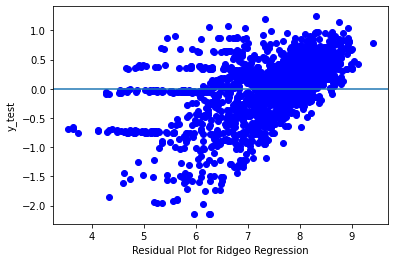

In [59]:
#residue after ridge
residue_rr = y_test-rr_pred
#Plotting Residual Plot
plt.scatter(y_test,residue_rr, c = "blue")
plt.xlabel("Residual Plot for Ridgeo Regression")
plt.ylabel("y_test")
plt.axhline(y = 0)

# Plotting the coeffecients of each model

<AxesSubplot:title={'center':'Linear'}>

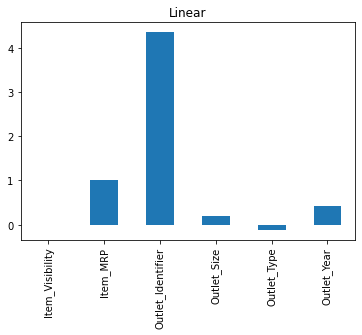

In [60]:
#Linear Regression
Lreg_coef = pd.Series(reg.coef_,index =x.columns)
Lreg_coef.plot(kind="bar", title= "Linear")

<AxesSubplot:title={'center':'Lasso'}>

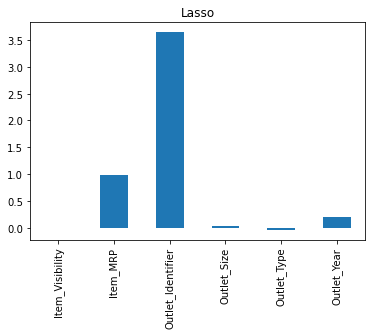

In [61]:
# Lasso Regression
lasso_coef = pd.Series(ls.coef_,index =x.columns)
lasso_coef.plot(kind="bar", title= "Lasso")

<AxesSubplot:title={'center':'Ridge'}>

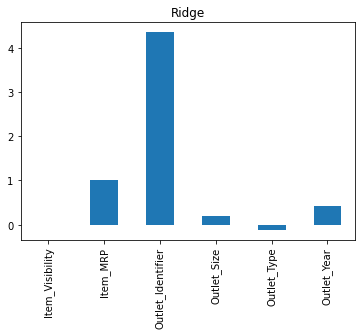

In [62]:
# Ridge Regression
ridge_coef = pd.Series(rr.coef_,index =x.columns)
ridge_coef.plot(kind="bar", title= "Ridge")

In [63]:
df1 = pd.DataFrame(columns=["Linear Regression", "Ridge Regression","Lasso Regression"])
for i in range(len(rr.coef_)):
    df1=df1.append({"Linear Regression":reg.coef_[i],"Ridge Regression":rr.coef_[i], "Lasso Regression":ls.coef_[i]}, ignore_index = True)
df1

,Linear Regression,Ridge Regression,Lasso Regression
0,-0.001368,-0.001376,-0.000000
1,1.016079,1.016074,0.984891
2,4.351069,4.350739,3.646510
3,0.202440,0.202388,0.032496
4,-0.114157,-0.114127,-0.041622
5,0.425280,0.425214,0.199973


# Deciding Best Fit Model
<u><b>RMSE:</b></u>

<b>Linear Regression:</b> 0.5375914591271844

<b>Lasso Regression:</b> 0.5517663802701465

<b>Ridge Regression:</b> 0.5375929508668702

<u><b>r2_score:</b></u>

<b>Linear Regression:</b> 72.95010719621588 %

<b>Lasso Regression:</b> 71.50482703170576 %

<b>Ridge Regression:</b> 72.95010719621588 %

A model is said to be best fit if r2_score is closer to 100% and has a better RMSE score.

1) Lasso regression has lower accuracy than Linear and Ridge Regression.

2) Ridge regression and Linear regression have similar R2_Score values. But Linear Regression model has better RMSE value. 

Therefore, the best fit model for the given dataset is: <b>LINEAR REGRESSION</b>

# STEP 6: Predicting the values of sales for the data given in the file Test.csv

In [64]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
8523,9,20.750,9185,0.007565,1989,107.8622,1550,4655,3980,9294,NaN,21
8524,9,8.300,5019,0.038428,1136,87.3198,1543,7996,4641,9294,NaN,13
8525,9,14.600,9185,0.099575,280,241.7538,925,7996,5583,1805,NaN,22
8526,9,7.315,9185,0.015388,1989,155.0340,1543,7996,4641,9294,NaN,13
8527,9,13.600,5019,0.118599,1136,234.2300,1559,4655,5583,1559,NaN,35


In [65]:
test= test.drop(["Item_Outlet_Sales"],axis=1)
test_= test.drop(['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type'],axis=1)

In [66]:
test_.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Year
8523,0.007565,107.8622,1550,4655,9294,21
8524,0.038428,87.3198,1543,7996,9294,13
8525,0.099575,241.7538,925,7996,1805,22
8526,0.015388,155.0340,1543,7996,9294,13
8527,0.118599,234.2300,1559,4655,1559,35


# Normalizing the Test dataset values

In [67]:
test_.skew()

Item_Visibility      1.307908
Item_MRP             0.136182
Outlet_Identifier   -2.244334
Outlet_Size         -0.803264
Outlet_Type         -0.650193
Outlet_Year          0.396306
dtype: float64

In [68]:
for i in test_.columns:
    test_[i] =np.log(test_[i])

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Outlet_Year', ylabel='Density'>

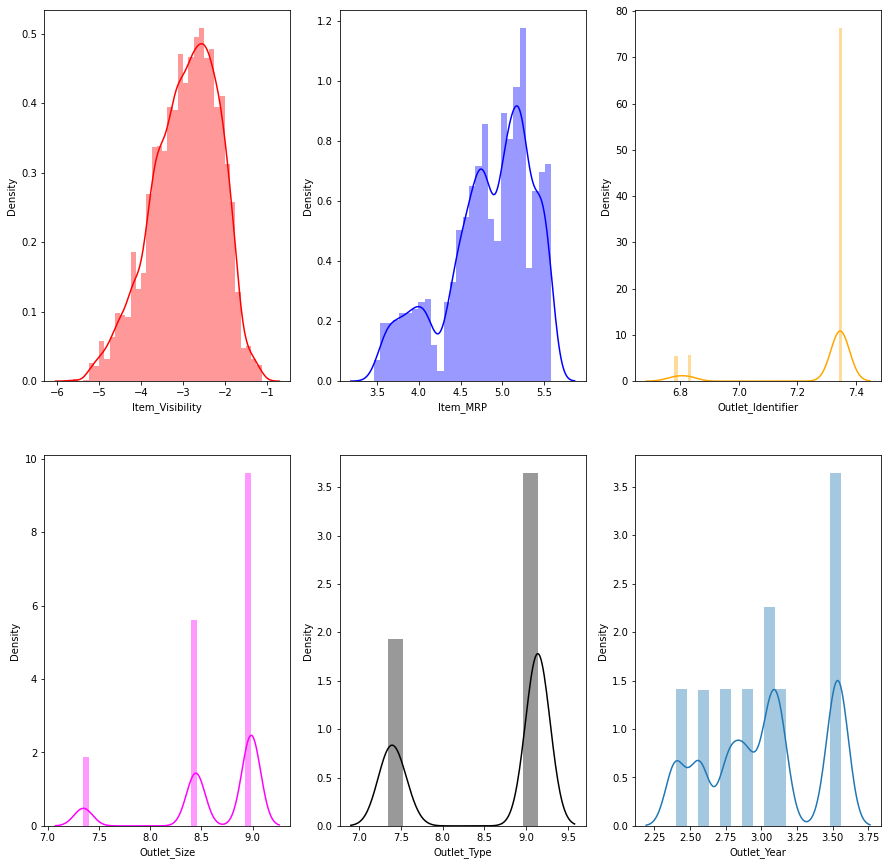

In [69]:
fig, ax = plt.subplots(2,3,figsize = (15,15))
sns.distplot(test_["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(test_["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(test_["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.distplot(test_["Outlet_Size"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(test_["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(test_["Outlet_Year"], kde =True, ax=ax[1,2])

In [70]:
test_.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Year
8523,-4.884245,4.680854,7.346010,8.445697,9.137124,3.044522
8524,-3.258977,4.469577,7.341484,8.986697,9.137124,2.564949
8525,-2.306845,5.487920,6.829794,8.986697,7.498316,3.091042
8526,-4.174142,5.043644,7.341484,8.986697,9.137124,2.564949
8527,-2.132005,5.456304,7.351800,8.445697,7.351800,3.555348


# Applying the Linear Regression Model to the test dataset

In [71]:
item_outsale_pred = reg.predict(test_)

In [72]:
item_outsale_pred

array([7.35563223, 7.02460759, 6.24244119, ..., 7.48852756, 7.93722829,
       7.08415617])

In [73]:
#Performing inverse transformation
actual_item_outsale = np.exp(item_outsale_pred+1)

In [74]:
actual_item_outsale

array([4254.07330943, 3055.22216457, 1397.50137008, ..., 4858.70663984,
       7610.07485536, 3242.68241806])

In [77]:
#ADDING THE PREDICTED ITEM_OUTLET_SALE COLUMNS TO TEST DATA
test = pd.read_csv("Test.csv")
test["Item_Outlet_Sales"] = actual_item_outsale

In [78]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,4254.073309
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,3055.222165
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1397.501370
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,5481.623853
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,14559.921869
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,6486.848411
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,6168.860049
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,4858.706640
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,7610.074855


# Saving the predicted values to the test dataset as testLR.csv

In [79]:
test.to_csv('testLR.csv')

# Analysing the Dataset
<b>
Item_Identifier: Code given to items
        
Item_Weight: Weight of an item
    
Item_Fat_Content: Fat content of the item like low, high etc
    
Item_Visibility: A continuous value indicating the visibility of the item for a customer
    
Item_Type: Type of the item like dairy, vegetables etc
    
Item_MRP: Maximum retail price of the item
    
Outlet_Identifier: Code given to outlets
    
Outlet_Establishment_Year : Year of establishment of an outlet
    
Outlet_Size: Size of an outlet like medium, high etc.
    
Outlet_Location_Type: Location of the outlet in a city like Tier1, 2 etc.
    
Outlet_Type: Type of the outlet like supermarket, grocery shop etc.
    
Item_Outlet_Sales: Sale value of an item in outlet. It is a target variable.
    

# MY ANALYSIS:

The heatmap described that Item_Identifier, Item_Weight, item_fat_content, Item_Type, Outlet_Location_Type have less correlation with the Item_Outlet_Sales (Target Variable). Therefore, We removed these predictors from the model.

The Predictor variables (X):'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type','Outlet_Year'.
    
The Target variavle (Y)    : Item_Outlet_Sales </b>

# Lets plot various graphs to get an insight on the dataset

In [80]:
vis = pd.read_csv("insight.csv")
vis.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Year
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,21
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,11
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,21
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,22
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,33


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

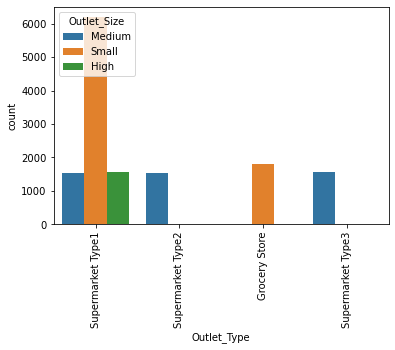

In [81]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = vis, x = "Outlet_Type",hue = "Outlet_Size")
plt.xticks(rotation =90)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

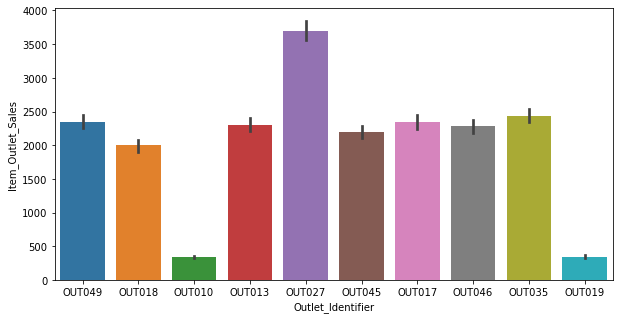

In [82]:
# Relation between Outlet_Identifier and Item_Outlet_Sales
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = vis, x = "Outlet_Identifier", y= "Item_Outlet_Sales")

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

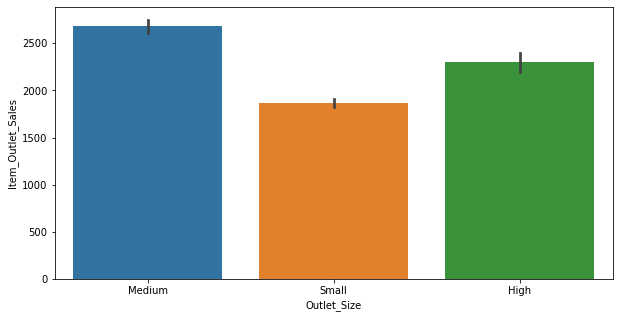

In [83]:
plt.figure(figsize = (10,5))
sns.barplot(data = vis, x = "Outlet_Size", y= "Item_Outlet_Sales")

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

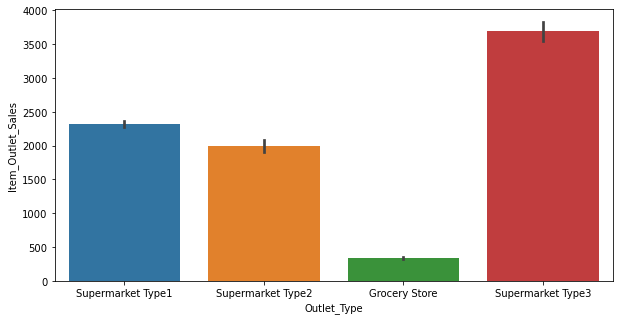

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = vis, x = "Outlet_Type", y= "Item_Outlet_Sales")

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

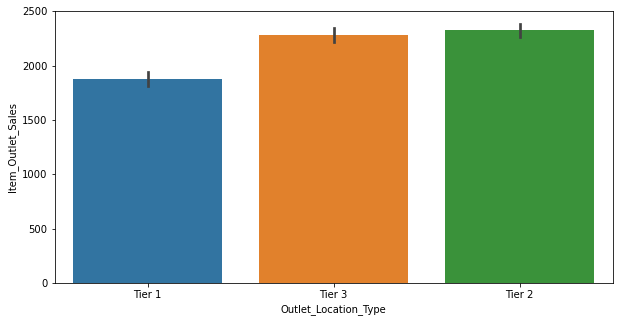

In [85]:
plt.figure(figsize = (10,5))
sns.barplot(data = vis, x = "Outlet_Location_Type", y= "Item_Outlet_Sales")

Text(0, 0.5, 'Mean of Item outlet sales')

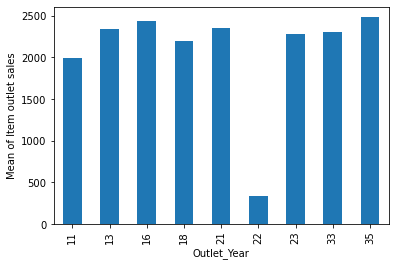

In [86]:
vis.groupby("Outlet_Year")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

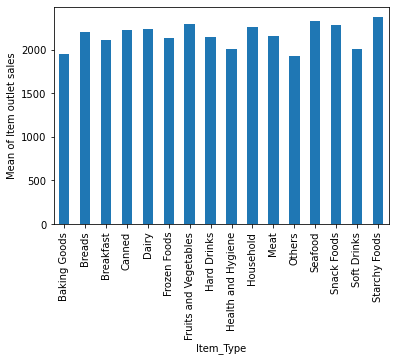

In [87]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
vis.groupby("Item_Type")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

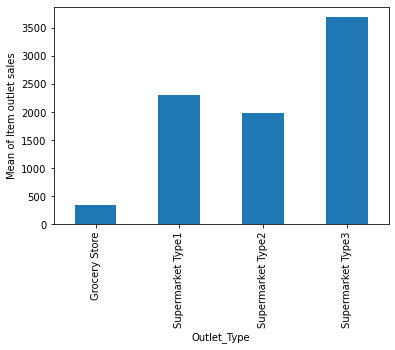

In [88]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
vis.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Low Fat    0.646649
Regular    0.353351
Name: Item_Fat_Content, dtype: float64


C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


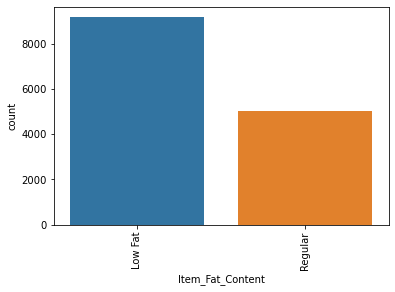

In [89]:
sns.countplot(vis["Item_Fat_Content"]).set_title="Item_Fat_Content"
print(vis["Item_Fat_Content"].value_counts(normalize=True))
plt.xticks(rotation=90)
plt.show()

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Small     0.562940
Medium    0.327725
High      0.109335
Name: Outlet_Size, dtype: float64


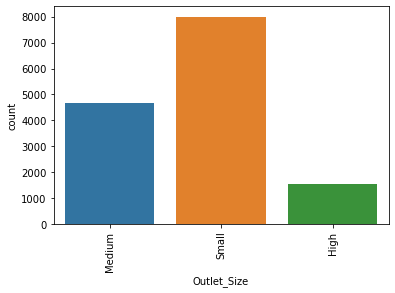

In [90]:
sns.countplot(vis["Outlet_Size"]).set_title="Outlet_Size"
print(vis["Outlet_Size"].value_counts(normalize=True))
plt.xticks(rotation=90)
plt.show()

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Tier 3    0.393058
Tier 2    0.326739
Tier 1    0.280203
Name: Outlet_Location_Type, dtype: float64


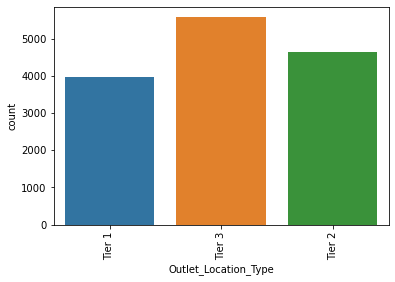

In [91]:
sns.countplot(vis["Outlet_Location_Type"]).set_title="Outlet_Location_Type"
print(vis["Outlet_Location_Type"].value_counts(normalize=True))
plt.xticks(rotation=90)
plt.show()

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Fruits and Vegetables    0.141721
Snack Foods              0.140031
Household                0.108983
Frozen Foods             0.100394
Dairy                    0.079977
Baking Goods             0.076457
Canned                   0.076317
Health and Hygiene       0.060406
Meat                     0.051816
Soft Drinks              0.051112
Breads                   0.029288
Hard Drinks              0.025486
Others                   0.019713
Starchy Foods            0.018938
Breakfast                0.013095
Seafood                  0.006266
Name: Item_Type, dtype: float64


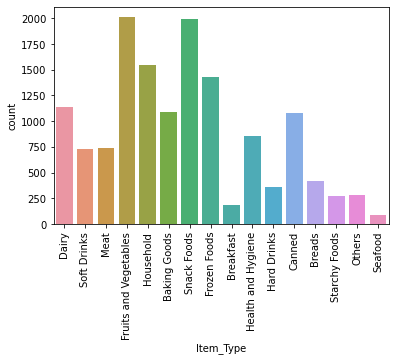

In [92]:
sns.countplot(vis["Item_Type"]).set_title="Item_Type"
print(vis["Item_Type"].value_counts(normalize=True))
plt.xticks(rotation=90)
plt.show()

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


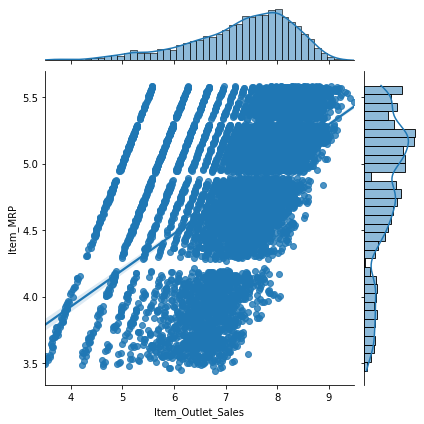

In [93]:
sns.jointplot(train["Item_Outlet_Sales"],train["Item_MRP"],kind="reg")

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


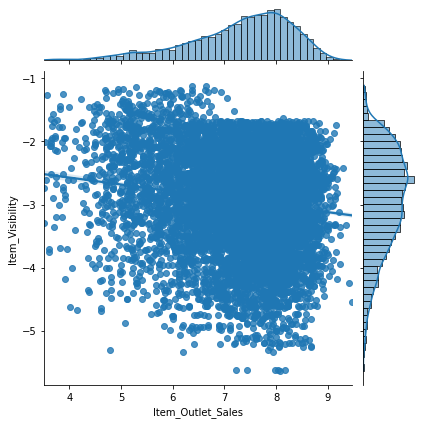

In [94]:
sns.jointplot(train["Item_Outlet_Sales"],train["Item_Visibility"],kind="reg")

# Conclusions:
<b>After plotting vatious graphs and plotting of heatmap:

The most significant predictors is: Item_MRP

The other significant predictors are: Outlet_Type, Outlet_Size, Outlet_Year.

1 . Stores located in Tier 2 cities should have higher sales.

2 . Stores with higher population will have more sales.

3 . Stores located within popular marketplaces should have higher sales because of better access to customers. 

4 . The most common food that people buy is Fruits nad Vegetables, Snack items and Frozen foods.

5 . Though the number of small size shops are more, Medium and large shops get better sales as they can accomodate more items.

Sales increase with respect to bigger size of outlet, lower prices of items, populat locations, variety of items available, number of years of establishment.</b>
